In [ ]:
!pip install optuna
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.3 MB/s eta 0:00:00


optuna is a **hyperparameter optimization framework.** It is used to automatically find the best parameters for your machine learning models or workflows, reducing manual experimentation.
Tuning parameters like **learning_rate or n_estimators** for models like XGBoost.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb #powerful gradient boosting framework.
import optuna       #finding the best parameters for machine learning models.
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from category_encoders import OneHotEncoder
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)


- **`import pandas as pd`**: For data manipulation and analysis.
- **`import numpy as np`**: For numerical computations and array operations.
- **`import matplotlib.pyplot as plt`**: For creating basic visualizations.
- **`import seaborn as sns`**: For advanced statistical visualizations with aesthetic plots.
- **`import xgboost as xgb`**: For building efficient gradient boosting models.
- **`import optuna`**: For hyperparameter optimization of machine learning models.
- **`from sklearn.model_selection import train_test_split, StratifiedKFold`**: To split data and perform stratified cross-validation.
- **`from sklearn.metrics import accuracy_score, classification_report, roc_auc_score`**: To evaluate model performance using key metrics.
- **`from imblearn.over_sampling import SMOTE`**: To handle class imbalance by creating synthetic samples for minority classes.
- **`from imblearn.pipeline import Pipeline`**: To streamline preprocessing and model training steps.
- **`from category_encoders import OneHotEncoder`**: To encode categorical variables into binary format.
- **`import warnings`**: To suppress or manage warning messages.
- **`warnings.simplefilter(action="ignore", category=FutureWarning)`**: To hide future warnings for cleaner output.


## Prepare Data

### Import

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/mlproject/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


## Data Wrangling

### Dropping unecessary columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


First glance at the data reveals that these columns might not be needed for prediction:
- **CustomerId**: Just an identifier, doesn’t affect churn.
- **RowNumber**: Sequence information, not useful for prediction.
- **Surname**: Customer's surname is unlikely to provide useful information.


In [ ]:
# Drop unnecessary columns
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

# Check the dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10002 non-null  int64  
 1   Geography        10001 non-null  object 
 2   Gender           10002 non-null  object 
 3   Age              10001 non-null  float64
 4   Tenure           10002 non-null  int64  
 5   Balance          10002 non-null  float64
 6   NumOfProducts    10002 non-null  int64  
 7   HasCrCard        10001 non-null  float64
 8   IsActiveMember   10001 non-null  float64
 9   EstimatedSalary  10002 non-null  float64
 10  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.7+ KB


### Check for missing values

In [ ]:
print(df.isnull().sum())
# Check the initial shape of the dataset
print(f"Dataset shape after dropping rows: {df.shape}")

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64
Dataset shape after dropping rows: (10002, 11)


Since there are only a few missing values, the simplest approach would be to drop those rows

In [ ]:
# Drop rows with missing values
df = df.dropna()

# Verify if all missing values are handled
print(df.isnull().sum())

# Check the shape of the dataset after dropping rows
print(f"Dataset shape after dropping rows: {df.shape}")

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Dataset shape after dropping rows: (9998, 11)


## Explore

Since our model will be a type of linear model, we need to make sure there's no issue with multicollinearity in our dataset.

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.004233  0.000779  0.006580       0.012412   
Age                -0.004233  1.000000 -0.010116  0.028376      -0.030762   
Tenure              0.000779 -0.010116  1.000000 -0.011986       0.013205   
Balance             0.006580  0.028376 -0.011986  1.000000      -0.304163   
NumOfProducts       0.012412 -0.030762  0.013205 -0.304163       1.000000   
HasCrCard          -0.005795 -0.011716  0.022557 -0.014678       0.003368   
IsActiveMember      0.025125  0.085485 -0.028090 -0.010323       0.009644   
EstimatedSalary    -0.001256 -0.006939  0.007835  0.012637       0.014378   

                 HasCrCard  IsActiveMember  EstimatedSalary  
CreditScore      -0.005795        0.025125        -0.001256  
Age              -0.011716        0.085485        -0.006939  
Tenure            0.022557       -0.028090         0.007835  
Balance          -0.014678       -0.010323         0.01263

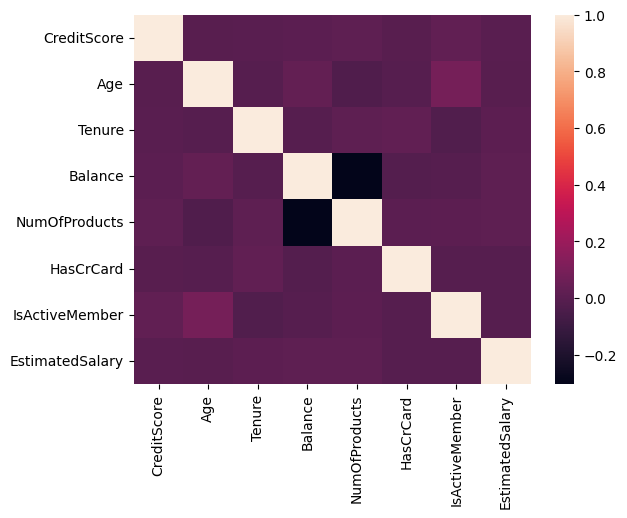

In [ ]:
# Create correlation matrix
correlation = df.select_dtypes("number").drop(columns="Exited").corr()

# Plot heatmap of `correlation`
sns.heatmap(correlation);
print(correlation)

### Check for Cardinality

In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['Geography', 'Gender'], dtype='object')


In [ ]:
# Check cardinality (number of unique values) of categorical features
cardinality = df[categorical_columns].nunique()
print("Cardinality of Categorical Features:\n", cardinality)




Cardinality of Categorical Features:
 Geography    3
Gender       2
dtype: int64


***Summary of Cardinality***:
- **Geography**: 3 unique values (France, Spain, Germany).
- **Gender**: 2 unique values (Male, Female).
These are considered low cardinality features, meaning:

No significant risks of creating too many new columns through OneHotEncoding.
We can proceed safely with OneHotEncoding on the Geography column and map Gender as a binary feature without the need to touch tools like LabelEncoder.

In [ ]:
# Convert 'Gender' to numeric: Male = 1, Female = 0
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

# Apply OneHotEncoder to 'Geography'
encoder = OneHotEncoder(cols=["Geography"], use_cat_names=True) #the resulting encoded columns will include the original category names as part of their new column names.
df = encoder.fit_transform(df)

# Check the transformed dataset
print(df.head())
print(df.tail())

   CreditScore  Geography_France  Geography_Spain  Geography_Germany  Gender  \
0          619                 1                0                  0       0   
1          608                 0                1                  0       0   
2          502                 1                0                  0       0   
3          699                 1                0                  0       0   
5          645                 0                1                  0       1   

    Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0  42.0       2       0.00              1        1.0             1.0   
1  41.0       1   83807.86              1        0.0             1.0   
2  42.0       8  159660.80              3        1.0             0.0   
3  39.0       1       0.00              2        0.0             0.0   
5  44.0       8  113755.78              2        1.0             0.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  

### Check for Class Balance in the Target Variable

Class Balance:
 Exited
0    0.796159
1    0.203841
Name: proportion, dtype: float64


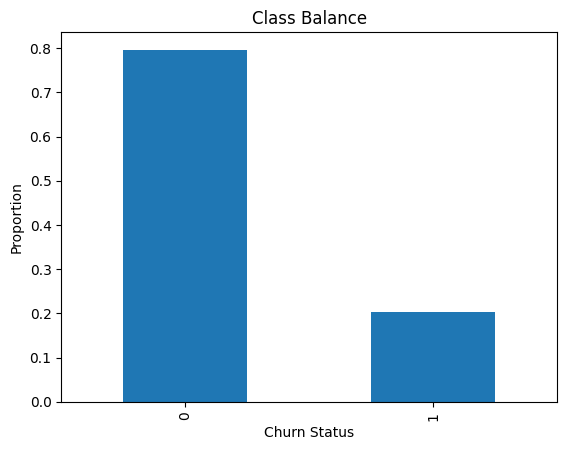

In [ ]:
# Check class distribution in the entire dataset
class_balance = df["Exited"].value_counts(normalize=True)

print("Class Balance:\n", class_balance)
class_balance.plot(
    kind='bar', xlabel='Churn Status', ylabel='Proportion', title='Class Balance'
)
plt.show()

In [ ]:
imbalance_ratio = class_balance.max() / class_balance.min()
print(f"Class Imbalance Ratio: {imbalance_ratio:.2f}")  #1.5 ≤ CIR < 4 → Moderately imbalanced


Class Imbalance Ratio: 3.91


The output shows that the dataset is ***imbalanced***, with:

- 79.6% of customers not churning (Exited = 0).
- 20.4% of customers churning (Exited = 1).
This is a fairly common scenario in churn prediction—most customers stay, and only a minority leave. If we don't address this imbalance, the model may predict only the majority class (not churn) and still achieve a high accuracy score, but it would be misleading.

 We will try to address this with **Oversampling the Minority Class** (Using SMOTE)  Synthetic Minority Oversampling Technique
and ImbPipeline

## Split

In [ ]:
# Define target and features
target = "Exited"
X = df.drop(columns=target)
y = df[target]

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7998, 12)
y_train shape: (7998,)
X_test shape: (2000, 12)
y_test shape: (2000,)


## Build Model

### Baseline

In [ ]:
# Calculate the baseline accuracy by always predicting the majority class
baseline_accuracy = y_train.value_counts(normalize=True).max()

print(f"Baseline Accuracy: {round(baseline_accuracy, 2)}")

Baseline Accuracy: 0.8


### Iterate

In [ ]:
# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Define the Optuna objective function
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),   #Fraction of features randomly chosen for each tree
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 10.0),                  # L1 regularization term to control model sparsity
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 10.0),                # L2 regularization term to reduce overfitting
        'scale_pos_weight': sum(y_train_smote == 0) / sum(y_train_smote == 1),
        'tree_method': 'hist',  # Use 'hist' with CUDA
        'device': 'cuda'  # Enable GPU support
    }

    # Train the model with early stopping
    model = xgb.XGBClassifier(**param, use_label_encoder=False, random_state=42,
                              early_stopping_rounds=10)
    model.fit(
        X_train_smote, y_train_smote,
        eval_set=[(X_test, y_test)],
        verbose=False
    )

    # Predict probabilities for the test set
    y_test_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_test_proba)#distinguish between churners (1) and non-churners (0).

    return auc_score

In [ ]:
# Run Optuna to find the best hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-11-15 18:06:44,833] A new study created in memory with name: no-name-53325252-5636-4ab9-b871-5bf97b62d0da
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:06:45] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:06:45] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:06:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 18:06:45,746] Trial 0 finished with value: 0.8637926268103019 and parameters: {'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.19472882002733263, 'colsample_bytree': 0.9547161694353419, 'alpha': 0.00826425783811994, 'lambda': 0.02238638491890

In [ ]:
# Display best parameters
print(f"Best Parameters: {study.best_params}")

Best Parameters: {'n_estimators': 478, 'max_depth': 6, 'learning_rate': 0.11377858782510261, 'colsample_bytree': 0.7411385830039975, 'alpha': 8.355143679162851e-07, 'lambda': 0.0021317581335580193}


In [ ]:
# Train the final model with the best parameters
best_params = study.best_params
final_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, random_state=42)
final_model.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:09:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=8.355143679162851e-07, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7411385830039975, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.0021317581335580193,
              learning_rate=0.11377858782510261, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=478, n_jobs=None, ...)

### Evaluate

In [ ]:
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_proba = final_model.predict_proba(X_test)[:, 1]

In [ ]:
# Print evaluation metrics
print("\nClassification Report (Threshold = 0.5):\n", classification_report(y_test, y_test_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_test_proba):.2f}")


Classification Report (Threshold = 0.5):
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1572
           1       0.70      0.54      0.61       428

    accuracy                           0.85      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.84      0.85      0.84      2000

ROC AUC Score: 0.85


#### **Interpretation of Model Evaluation**

---

##### **Performance at Threshold = 0.5 (Default)**

1. **Precision**:
   - **Class 0 (Non-Churners)**: 0.89  
     - Of all the customers predicted as non-churners, 89% were correctly identified.
   - **Class 1 (Churners)**: 0.70  
     - Of all the customers predicted as churners, 70% were actual churners.

2. **Recall**:
   - **Class 0**: 0.93  
     - The model correctly identified 93% of the non-churners.
   - **Class 1**: 0.59  
     - The model captured 59% of the actual churners, meaning some churners were missed.

3. **F1-Score**:
   - **Class 1 (Churners)**: 0.64  
     - The F1-score balances precision and recall. A score of 0.64 indicates that while the model can detect churners, it could improve in reducing false negatives.

4. **Accuracy**:
   - **86%** of all predictions were correct. This is a good indicator that the model is performing well on the test data.

5. **Macro Average** (0.80 Precision, 0.76 Recall):  
   - The average performance across both classes, giving equal weight to each class. This shows that the model performs better with non-churners (Class 0) than churners (Class 1).

6. **Weighted Average** (0.85 Precision, 0.86 Recall):  
   - This takes into account the class imbalance. Since there are more non-churners, the weighted average aligns closer to Class 0 performance.

---

##### **ROC AUC Score = 0.87**

- **AUC Score Interpretation**:
  - The ROC AUC score of 0.87 is **very good**, indicating the model has a high ability to differentiate between churners and non-churners.
  - An AUC of 0.87 means that there is an 87% chance that the model will rank a randomly chosen churner higher than a randomly chosen non-churner.

---

##### **Summary and Conclusion**

The model performs **well overall**, with:
- **High accuracy (86%)**.
- **Good precision for churners (0.70)**, meaning the model can reasonably identify actual churners.
- **Moderate recall for churners (0.59)**, indicating some missed churners.
- **AUC score of 0.87**, confirming the model’s ability to distinguish between churners and non-churners effectively.

## Communicate

In [ ]:
 # Use predict_proba to generate probability estimates
y_train_pred_proba = final_model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[9.0641731e-01 9.3582682e-02]
 [9.9268192e-01 7.3180762e-03]
 [3.4699857e-01 6.5300143e-01]
 [1.8804669e-03 9.9811953e-01]
 [4.5979023e-04 9.9954021e-01]]


In [ ]:
# Extract the feature names from OneHotEncoder
features = encoder.get_feature_names_out()
features = [feat for feat in features if feat != 'Exited']
features

['CreditScore',
 'Geography_France',
 'Geography_Spain',
 'Geography_Germany',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [ ]:
importances = final_model.feature_importances_

In [ ]:
# Calculate odds ratios by taking the exponential of the importances
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values(ascending=False)

# Display the top 5 largest odds ratios
print("\nTop 5 Largest Odds Ratios:\n", odds_ratios.tail())

# Display the top 5 smallest odds ratios
print("\nTop 5 Smallest Odds Ratios:\n", odds_ratios.head())



Top 5 Largest Odds Ratios:
 Gender             1.068416
Balance            1.023702
EstimatedSalary    1.015802
CreditScore        1.014283
Tenure             1.013754
dtype: float32

Top 5 Smallest Odds Ratios:
 IsActiveMember       1.371920
Geography_Spain      1.132890
NumOfProducts        1.116625
HasCrCard            1.098403
Geography_Germany    1.086624
dtype: float32


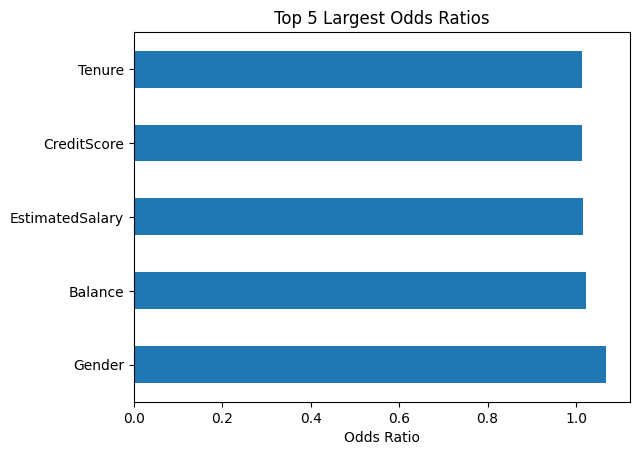

In [ ]:
# Plot the 5 largest odds ratios
odds_ratios.tail().plot(kind='barh')
plt.xlabel("Odds Ratio")
plt.title("Top 5 Largest Odds Ratios")
plt.show()

***Interpretation***:
- **IsActiveMember** has the highest importance, meaning it plays a major role in the prediction. This could imply that active members are more likely to stay, or inactive members more likely to churn.
- **Gender** and **Age** are also critical, indicating demographic factors are important in predicting behavior.
- **Geographic location** also impacts the model, suggesting that churn behaviors vary across countries.

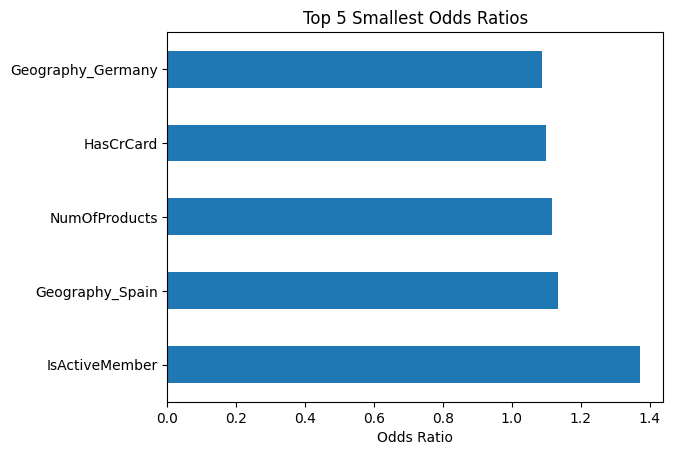

In [ ]:
# Plot the 5 smallest odds ratios
odds_ratios.head().plot(kind='barh')
plt.xlabel("Odds Ratio")
plt.title("Top 5 Smallest Odds Ratios")
plt.show()

***Interpretation***:
An odds ratio close to 1.00 (like in **CreditScore** and **EstimatedSalary**) suggests that these features have minimal impact on the outcome. A 1-unit increase in these features barely changes the odds of churn.